In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
import PIL

In [25]:
from os import listdir
from os.path import isfile, join

In [26]:
from keras.datasets import mnist

In [27]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [28]:
Xtr.shape

(60000, 28, 28)

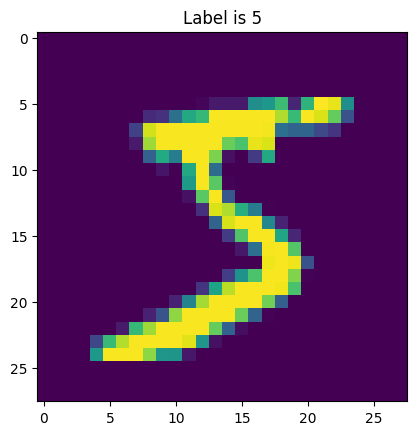

In [29]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


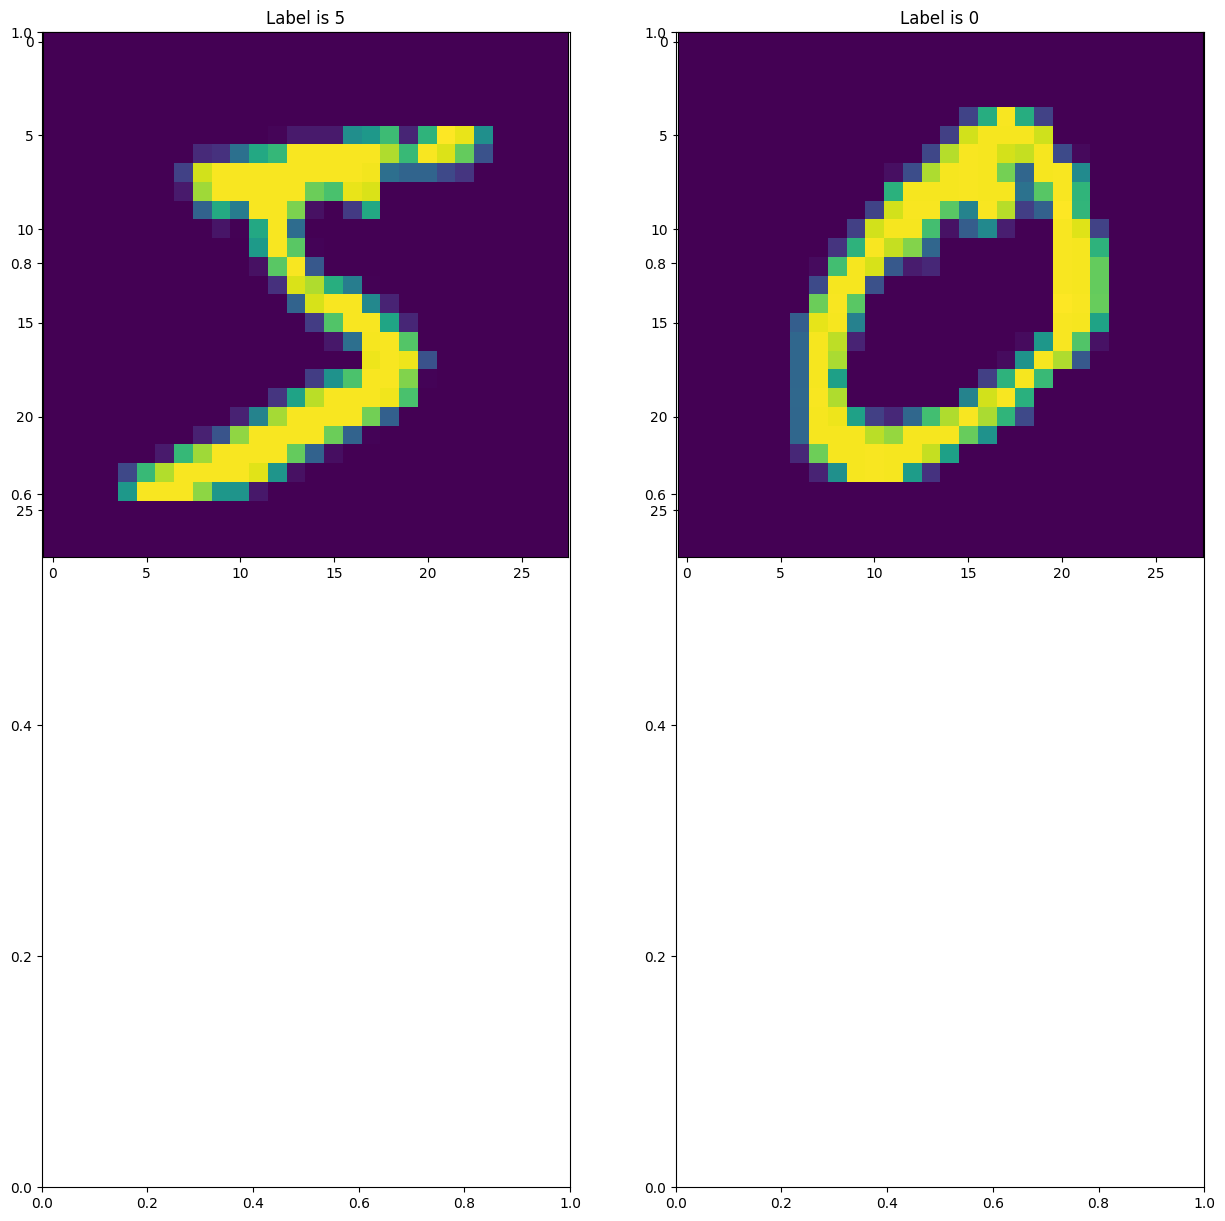

In [30]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [31]:
28*28

784

In [32]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [33]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [34]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649


In [51]:
imagefilenames = [f for f in listdir("../our_dataset") if isfile(join("../our_dataset", f))]
images = []
samples = []

for imagename in imagefilenames:
    with Image.open("../our_dataset/" + imagename) as im:
        image_array = np.array(im)
        images.append(image_array)
        x, y = image_array.shape[:2]
        samples.append([len(imagefiles), x, y, 3])

samples = np.array(samples, dtype=int)
images = np.array(images)


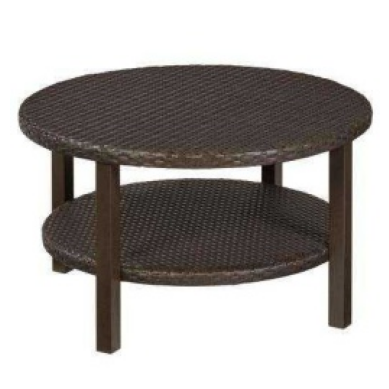

In [54]:
def PlotSample(index: int):
    plt.imshow(images[index]) 
    plt.axis('off')      
    plt.show()

PlotSample(8)